<a href="https://colab.research.google.com/github/ml5885/10-315-Mini-Project/blob/main/10315_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Impact of Lookback Window Size on Energy Consumption Forecasting

***********************************************************



**Model Card**

1) Task Input and Output - The input given to our model is a sequence of household appliance power consumption and weather data over a set lookback window size (in minutes). The output is a 10 minute window prediction of future power consumption using the LSTM and/or TCN.

2) Training Data - Our training data is pulled from a public dataset on Kaggle (linked in the cell which reads the data). The data contains 1-minute readings of power consumption of various household appliances and environments over the course of a year.

The appliances measured were a dishwasher, two furnaces, a fridge, a wine cellar, a garage door, a microwave, a home office, a barn, a well, a living room, and kitchen environments. These readings were taken using a smart home meter. In addition, the power generated by solar panels was recorded. There is also weather data for the region in which the power consumption was measured. This data is about visibility, cloud cover, temperature, pressure, wind, precipitation, and dew point.

The data appear to come from one house and were measured during periods of little to no precipitation and high visibility. There are approximately 504,000 individual data points.

The location of the data readings, the time period in which they were collected, and other details were not included with the source but can affect the model performance.

3) Intended Use - The models below are intended to forecast household power consumption. Given historical data about a particular household's  consumption or consumption in the region, a homeowner could analyze their own power consumption to save money and integrate environmentally-conscious practices. They can also identify anomalies in their power usage to identify particularly helpful or harmful behaviors.

4) Risks - There is risk of models such as these being misused against consumers. For example, power companies could employ such models to monitor their customers and change how much they charge adversarially at an individual level to increase profit.

***********************************************************

**Introduction**
The efficient management of energy consumption is crucial for both residential and commercial sectors. In this project, we aim to develop and compare the performance of various machine learning models for energy consumption forecasting. Specifically, we will focus on utilizing energy usage data (overall and appliance-level metrics) coupled with weather information to predict energy consumption patterns using long short-term memory networks (LSTM) and temporal convolutional networks (TCN). Using our dataset, we will investigate the effect of lookback window size on the performance of the LSTM and TCN.

***********************************************************

**Objectives**

* Comparing the performance of Long Short-Term Memory (LSTM) networks, and Temporal Convolutional Networks (TCNs) for energy consumption forecasting.
* Investigating the impact of varying the lookback window size on the predictive accuracy of TCN and LSTM models.
* Developing insights into the relationship between energy consumption patterns and weather conditions.

***********************************************************

**Methods**

We explored two model architectures for energy consumption forecasting:

1. **Long Short-Term Memory (LSTM) Networks:** A type of recurrent neural network able to learn long-term dependencies in sequential data, employing a gating mechanism to control information flow, making them suitable for time-series forecasting.

```python
  lstm_model = Sequential([
      LSTM(units=50,
          activation='relu',
          input_shape=(X_train.shape[1], X_train.shape[2]) # (num time steps, num features)
      ),
      Dense(n_future_steps) # Output layer with number of neurons equal to n_future_steps
  ])
```
> <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" alt="LSTM model architecture" width="500"/>
>
> *Visualization of the repeating module in an LSTM [1]*


2. **Temporal Convolutional Networks (TCNs):** A relatively new class of convolutional architectures designed for sequence modeling tasks. TCNs use dilated causal convolutions, ensuring outputs depend only on past inputs, suitable for real-time forecasting. They are known for their effectiveness in sequence modeling with parallelism and dilation [5].

```python
tcn_model = Sequential([
    TCN(kernel_size=3, input_shape=(X_train.shape[1], X_train.shape[2])), # (num time steps, num features)
    Dense(n_future_steps)  # Output layer with number of neurons equal to n_future_steps
])
```

><img src="https://github.com/philipperemy/keras-tcn/blob/master/misc/Dilated_Conv.png?raw=true" alt="TCN model architecture" width="700"/>
>
>*Visualization of a stack of dilated causal convolutional layers [2]*

Our experimental question focused on comparing these models' performance for energy consumption forecasting and investigating the impact of varying lookback window sizes (30, 60, 90, and 120 minutes) on the LSTM and TCN models' predictive accuracy. Lookback window size is the amount of previous time steps (in this case, minutes) used to make a prediction for the next time step.

We trained and evaluated the models on a dataset containing minute-by-minute appliance energy consumption and weather data. Relevant features, including lagged values and weather conditions, were extracted to incorporate temporal and external factors.

The LSTM and TCN models were implemented using Keras and Keras-TCN, trained with the Adam optimizer and mean squared error loss, and evaluated on test sets using metrics like MSE and R-squared.

In [ ]:
import pandas as pd
import io

!git clone https://github.com/rithikanarayan/10315_Project_Data.git

!unzip ./10315_Project_Data/archive.zip -d ./10315_Project_Data/file

!ls ./10315_Project_Data/file

!git clone https://github.com/ml5885/10-315-Mini-Project.git

!pip install keras-tcn

Cloning into '10315_Project_Data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 19.44 MiB | 20.39 MiB/s, done.
Archive:  ./10315_Project_Data/archive.zip
  inflating: ./10315_Project_Data/file/HomeC.csv  
HomeC.csv
Cloning into '10-315-Mini-Project'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 13 (delta 1), pack-reused 0
Receiving objects: 100% (14/14), 2.29 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (2/2), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Training flag
train = False

In [ ]:
# data source: https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information/data

df = pd.read_csv("./10315_Project_Data/file/HomeC.csv")

<ipython-input-2-217b9d5ffa99>:3: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./10315_Project_Data/file/HomeC.csv")


In [ ]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
num_columns = df.shape[1]

# Get the names of columns
column_names = df.columns.tolist()

print("Number of columns:", num_columns)
print("Column names:", column_names)

Number of columns: 32
Column names: ['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Creating train and test datasets from dataset

selected_columns = df.columns

data_numeric = df.drop(columns=['time', 'icon', 'summary', 'cloudCover'])

data_numeric = data_numeric.head(60000)

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numeric)

lookback_window_sizes = [30, 60, 90, 120]  # Selected lookback window sizes
n_future_steps = 10

datasets = []

# Creating dataset for each lookback window size

for lookback_window in lookback_window_sizes:
    sequences = []
    for i in range(len(data_normalized) - lookback_window - n_future_steps + 1):
        sequences.append(data_normalized[i:i+lookback_window+n_future_steps])

    sequences = np.array(sequences)

    X = sequences[:, :-n_future_steps]
    y = sequences[:, -n_future_steps:, 0]

    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    datasets.append((X_train, X_test, y_train, y_test, lookback_window))

    del sequences
    del X
    del y

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tcn import TCN, tcn_full_summary

In [ ]:
def run_experiment(model_type, datasets, train):
    '''
    Run experiments using either LSTM or TCN models on given datasets.

    Parameters:
        model_type (str): The type of model to use. Must be either "LSTM" or "TCN".
        datasets (list): A list of tuples containing training and testing data.
        train (bool): Whether to train the model or not.

    Returns:
        results (list): A list of tuples containing the results of the experiments.
                      Each tuple has the format (loss, r_squared, lookback_window)
    '''
    results = []

    for X_train, X_test, y_train, y_test, lookback_window in datasets:

        # Initialize model based on model type
        if model_type == "LSTM":
            model = Sequential([
                LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
                Dense(n_future_steps) # Output layer with number of neurons equal to n_future_steps
            ])

        elif model_type == "TCN":
            model = Sequential([
                TCN(input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_size=3
                    ),
                Dense(n_future_steps) # Output layer with number of neurons equal to n_future_steps
            ])

        model.compile(optimizer='adam', loss='mse')

        if train:
            with tf.device('/device:GPU:0'):
                model.fit(X_train, y_train,
                          epochs=5,
                          batch_size=32,
                          validation_split=0.2)
            # Save trained model parameters
            model.save_weights(f'{model_type}_{lookback_window}_weights.h5')
        else:
            # Load trained model parameters
            model.load_weights(f'/content/10-315-Mini-Project/{model_type}_{lookback_window}_weights.h5')

        # Collect metrics for this model
        loss = model.evaluate(X_test, y_test)
        predictions = model.predict(X_test)
        r_squared = r2_score(y_test, predictions)

        results.append((loss, r_squared, lookback_window))

        del predictions
        del model

    return results

In [ ]:
lstm_results = run_experiment(model_type='LSTM', datasets, train)
tcn_results = run_experiment(model_type='TCN', datasets, train)

375/375 [==============================] - 3s 7ms/step


375/375 [==============================] - 4s 11ms/step


375/375 [==============================] - 7s 17ms/step


375/375 [==============================] - 2s 4ms/step


In [ ]:
#Pat's feedback from email: I also think the experimental question is great. Just varying the lookback window size and seeing it's effect will be good for an experiment. **Make sure to explain what it means when a longer/shorter lookback window size performs better.**

**Results and Discussion**


Below we investigate the effect of lookback window size on LSTM and TCN performance and compare the abilities of both models to forecast power consumption based on our dataset.

We note that the LSTM outperformed the TCN across all lookback window sizes and metrics (MSE loss and R-squared values). However, the TCN trained 9 times faster than the LSTM (10 seconds per epoch versus 90 seconds per epoch), so future ML engineers might further investigate training and fine-tuning TCNs for this purpose as they conserve resources.

We found that as lookback window size increased, loss increased. This contradicted our expectation that trends in the power consumption may extend over a period of hours rather than minutes.

We present our interpretation of these findings: With a larger lookback window but only 10 future steps, the model's focus on historical data might obscure recent trends, as it places greater emphasis on past patterns. Consequently, the model may struggle to reflect the most current dynamics in the data, potentially leading to less accurate predictions for the future steps. In such cases, the model's ability to capture recent trends may be compromised by its reliance on a larger pool of historical data, which may not effectively represent the current state of the system.

In future work on this topic, we believe that LSTMs will continue to be the appropriate choice of model and method for the task. These types of recurrent neural networks are designed to capture long-term dependencies in sequential data. They are particularly well-suited for time-series forecasting tasks due to their ability to retain information over long periods. LSTMs have been successfully applied in energy forecasting tasks such as electricity load forecasting and wind/solar power generation prediction.





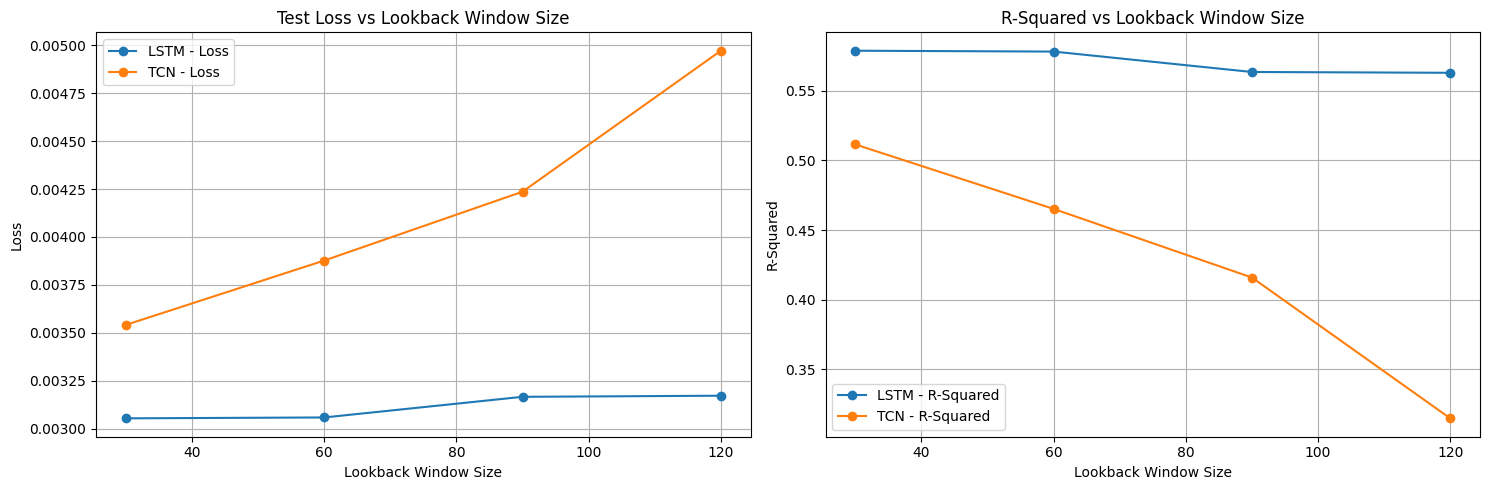

In [ ]:
import matplotlib.pyplot as plt

lstm_losses, lstm_r_squared, lstm_window_sizes = zip(*lstm_results)
tcn_losses, tcn_r_squared, tcn_window_sizes = zip(*tcn_results)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting test loss
axs[0].plot(lstm_window_sizes, lstm_losses, marker='o', label='LSTM - Loss')
axs[0].plot(tcn_window_sizes, tcn_losses, marker='o', label='TCN - Loss')
axs[0].set_title('Test Loss vs Lookback Window Size')
axs[0].set_xlabel('Lookback Window Size')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plotting R-squared
axs[1].plot(lstm_window_sizes, lstm_r_squared, marker='o', label='LSTM - R-Squared')
axs[1].plot(tcn_window_sizes, tcn_r_squared, marker='o', label='TCN - R-Squared')
axs[1].set_title('R-Squared vs Lookback Window Size')
axs[1].set_xlabel('Lookback Window Size')
axs[1].set_ylabel('R-Squared')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Visualization of Model Forecasts**

The following cell visualizes using LSTM and TCN models trained on 60 minute lookback window time series data to forecast energy usage. The predictions and actual energy usage values are plotted to compare the models' forecasts with the observed data. The plot provides insights into the models' predictive accuracy and their ability to capture energy consumption patterns. Adjustments can be made to the time window and visualization parameters as needed.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def invTransform(scaler, data):
    # Inverse transform for specific feature function from
    # https://stackoverflow.com/questions/53049396/sklearn-inverse-transform-return-only-one-column-when-fit-to-many
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

def plot_predictions(predictions, model_name):
    window = len(y_test)
    downsample_interval = 12 * 60
    downsampled_time_indices = np.arange(0, window, downsample_interval)
    actual_indices = downsampled_time_indices
    predicted_indices = [np.argmin(np.abs(np.arange(window) - idx)) for idx in downsampled_time_indices]

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    actual_y_test = invTransform(scaler, y_test)
    actual_predictions = invTransform(scaler, predictions)

    # Plotting actual vs. predicted for the entire test dataset (downsampled to every 12 hours)
    axes[0].plot(actual_indices, actual_y_test[actual_indices], label='Actual', color='#1f77b4')
    axes[0].plot(actual_indices, actual_predictions[predicted_indices], label='Predicted', color='darkorange')
    axes[0].set_title(f'Actual vs. {model_name} Predicted Energy Usage (Downsampled to Every 12 Hours)')
    axes[0].set_xlim([0, window])
    axes[0].set_xlabel('Time (minutes)')
    axes[0].set_ylabel('True Energy Usage')
    axes[0].legend()
    axes[0].grid(True)

    start_index = window - 6 * 60
    end_index = window
    actual_zoomed = actual_y_test[start_index:end_index]
    predicted_zoomed = actual_predictions[start_index:end_index]

    # Plotting actual vs. predicted for the last 6 hours of the test dataset
    axes[1].plot(range(start_index, end_index), actual_zoomed, label='Actual', color='#1f77b4')
    axes[1].plot(range(start_index, end_index), predicted_zoomed, label='Predicted', color='darkorange')
    axes[1].set_title(f'Actual vs. {model_name} Predicted Energy Usage (Last 6 hours)')
    axes[1].set_xlim([start_index, end_index])
    axes[1].set_xlabel('Time (minutes)')
    axes[1].set_ylabel('True Energy Usage')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = datasets[1][0], datasets[1][1], datasets[1][2], datasets[1][3]

lstm_model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(n_future_steps) # Output layer with number of neurons equal to n_future_steps
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.load_weights(f'/content/10-315-Mini-Project/LSTM_60_weights.h5')
lstm_predictions = lstm_model.predict(X_test)

tcn_model = Sequential([
    TCN(input_shape=(X_train.shape[1], X_train.shape[2]), kernel_size=3),
    Dense(n_future_steps)
])
tcn_model.compile(optimizer='adam', loss='mse')
tcn_model.load_weights(f'/content/10-315-Mini-Project/TCN_60_weights.h5')
tcn_predictions = tcn_model.predict(X_test)

375/375 [==============================] - 2s 3ms/step


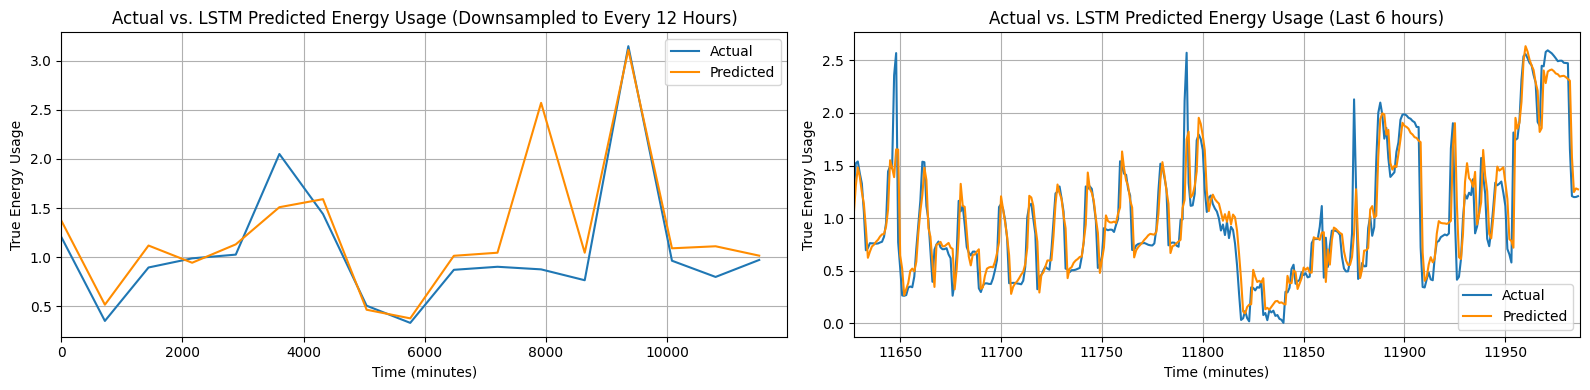

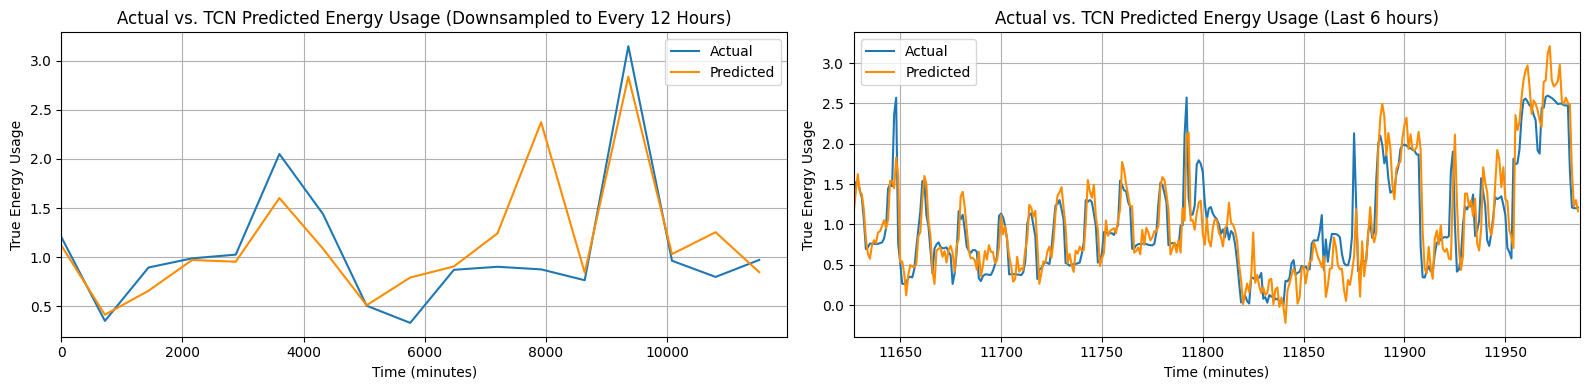

In [ ]:
plot_predictions(lstm_predictions, 'LSTM')

plot_predictions(tcn_predictions, 'TCN')

**References**

1. “Understanding LSTM Networks.” Colah’s Blog, colah’s blog, 27 Aug. 2015, https://colah.github.io/posts/2015-08-Understanding-LSTMs/.
2. Oord, Aaron van den, et al. "Wavenet: A generative model for raw audio." arXiv preprint arXiv:1609.03499 (2016).
3. "How to apply LSTM using PyTorch." Ahmad Anis. cnvrg.io. [https://cnvrg.io/pytorch-lstm/](https://cnvrg.io/pytorch-lstm/)
4. "LSTM." PyTorch.[https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
5. Lea, Colin S. et al. “Temporal Convolutional Networks: A Unified Approach to Action Segmentation.” ECCV Workshops (2016).
6. Antall, T. S.  Smart Home Dataset with weather Information. (2019) https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information/data